<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


## I.- Problema 01


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>


El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [9]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

**¿Cómo se distribuyen los datos?** La mejor forma de intentar de ver las distribuciones de estos datos es graficando sus histogramas.

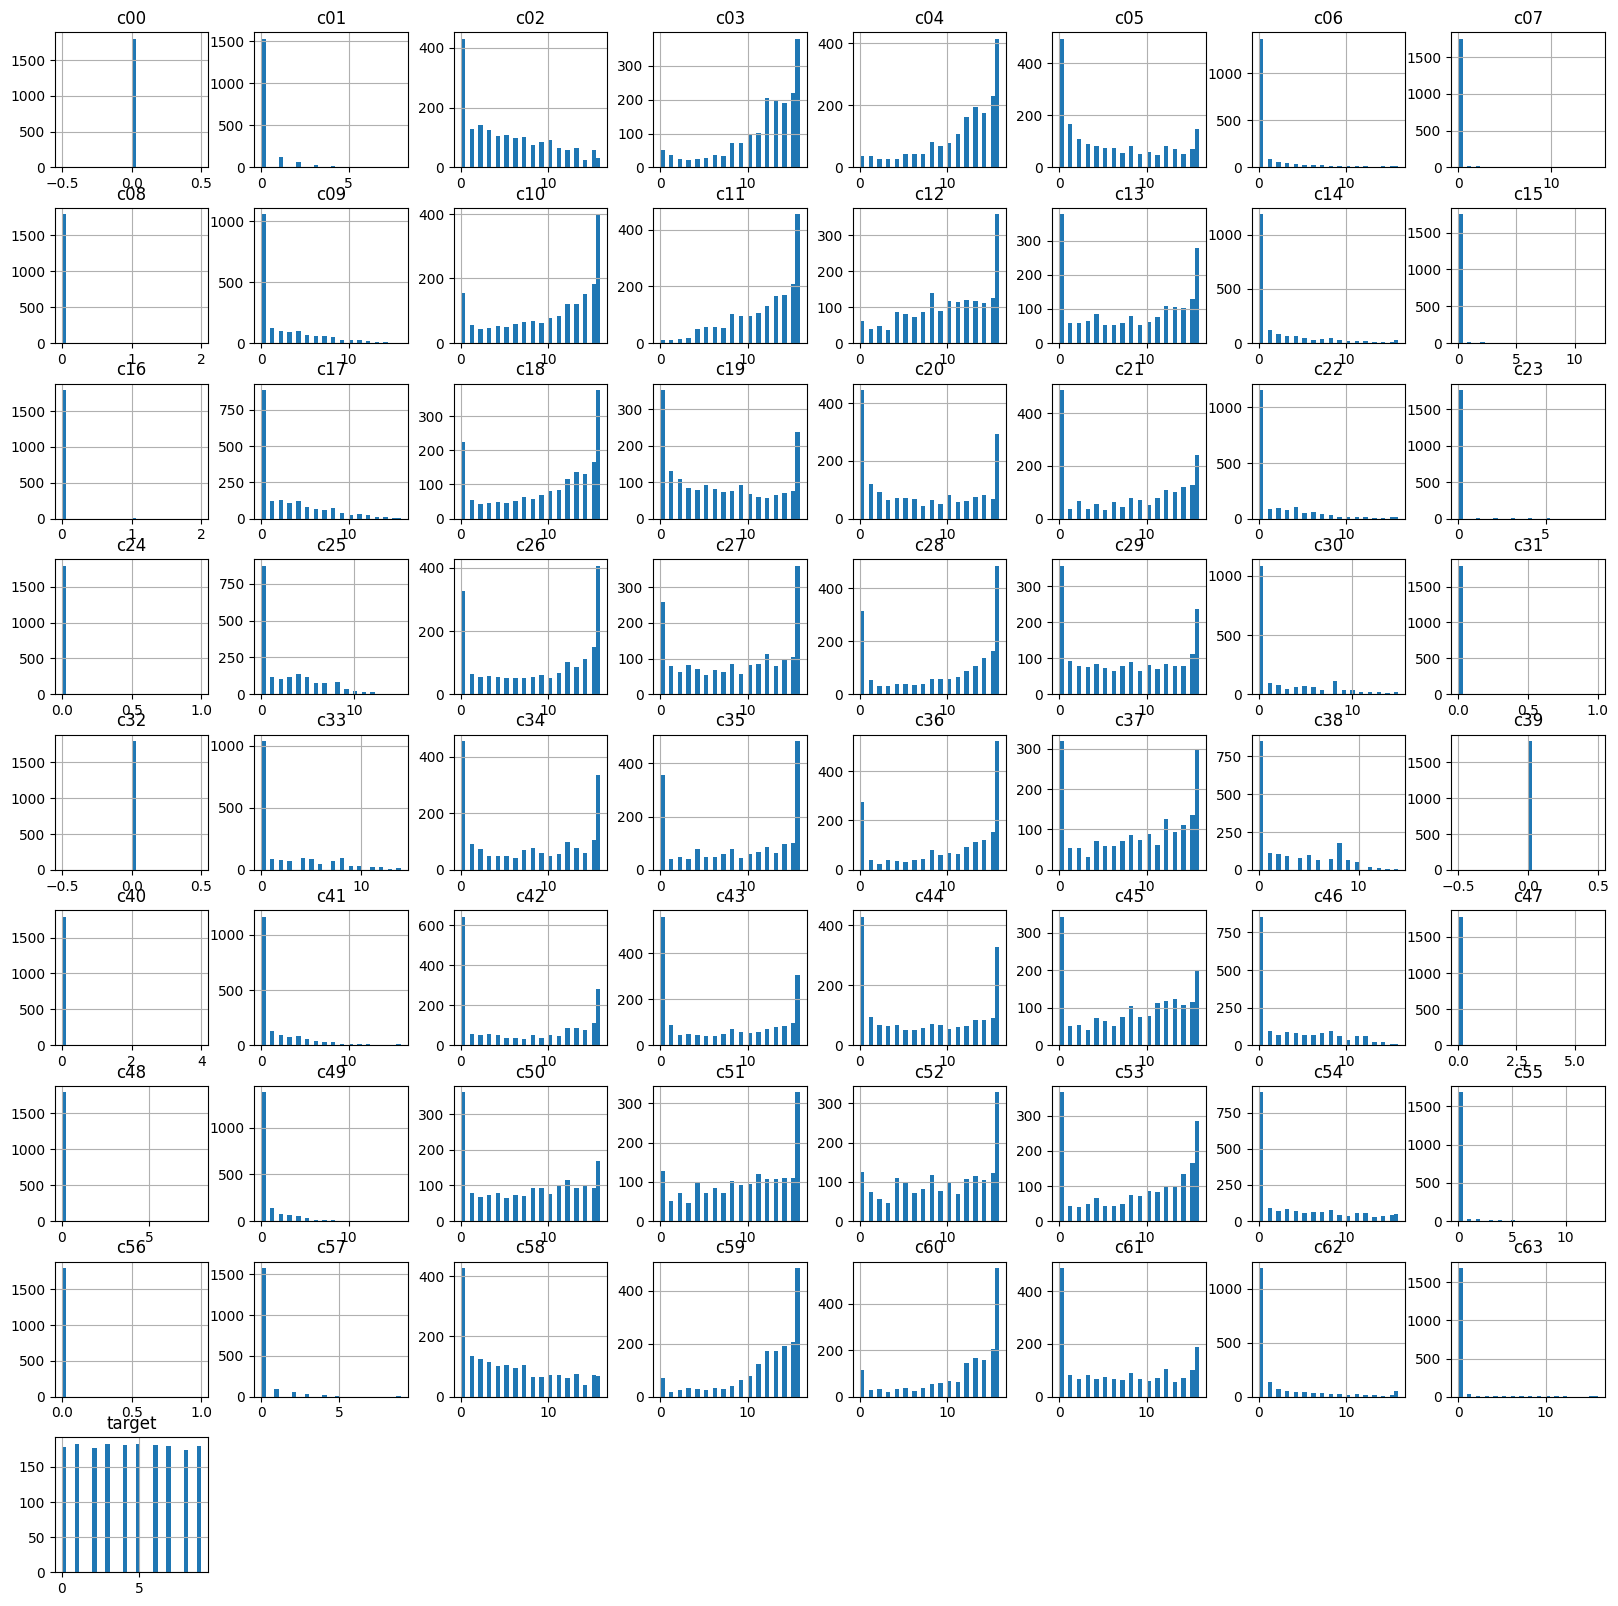

In [24]:
digits.hist(bins=32,figsize=(20,20))
plt.show()

No se puede inferir mucha información de estos gráficos. Eso sí, pareciese como si muchos gráficos tuvieran mas menos la misma forma, indicando posiblemente mucha correlación entre estas variables.

**¿Cuánta memoria estoy utilizando?** Podemos calcular esto directamente mediante el comando ".memory_usage"

In [12]:
print(digits.memory_usage(True).sum()/1024,'kB')

456.3984375 kB


**¿Qué tipo de datos son?** Podemos obtener un resumen de estos datos mediante el comando "dtypes"

In [15]:
digits.dtypes.value_counts()

int32    65
Name: count, dtype: int64

Es decir, todas las columnas de "digits" son del tipo int32. 

**¿Cuántos registros por clase hay?** Primero, revisemos si existe alguna entrada de la dataframe que no tenga un valor (es decir, si tiene valores NaN).

In [18]:
digits.isna().sum().sum()

0

Como no tiene ningun valor NaN, a "digits" no le falta ningun dato en ninguna columna, luego, cada clase tiene la misma cantidad de elementos que será la cantidad de filas en "digits". Este valor esta dado por el siguiente codigo:

In [19]:
digits.shape[0]

1797

**¿Hay registros que no se correspondan con tu conocimiento previo de los datos?** Por lo visto anteriormente, todos los datos corresponden con mi conocimiento previo de los datos. Todas las celdas del dataframe estan rellenas con números del tipo int32, y este hecho no permite que las entradas sean distintas de lo esperado.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [37]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

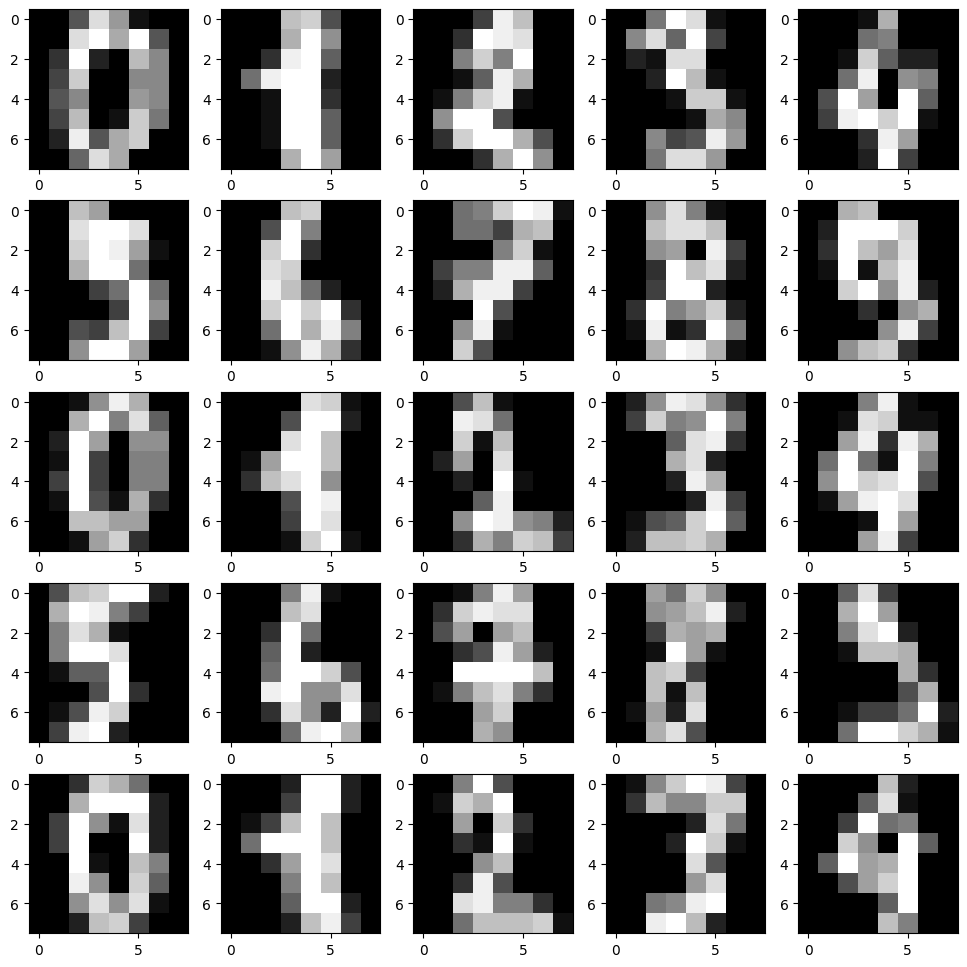

In [44]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx):
    for j in range(ny):
        axs[i,j].imshow(digits_dict['images'][5*i+j],cmap='gray')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


**train_test**: Vamos a crear un conjunto de entrenamiento que corresponda al 25% de los datos.

In [51]:
from sklearn.model_selection import train_test_split

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

print("Largo del conjunto de entrenamiento:",len(X_train))
print("Largo del conjunto de testeo:",len(X_test))

Largo del conjunto de entrenamiento: 1347
Largo del conjunto de testeo: 450


**modelo**: Los modelos a utilizar serán los modelos de "Logistic Regression", "K-Nearest Neighbors" y "Random Forest". Para medir la velocidad en la que se adaptan a los datos, usaremos la libreria "time".

In [59]:
import time

**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression

start_log=time.time()

reg_log = LogisticRegression(max_iter=10000)
reg_log.fit(X_train,y_train)
y_reg_log = reg_log.predict(X_test)

stop_log=time.time()

delta_log=stop_log-start_log

print('Tiempo:',delta_log)


Tiempo: 0.20849037170410156


**K Nearest Neighbors**

In [89]:
from sklearn.neighbors import KNeighborsClassifier

#K Nearest Neighbors

start_kn=time.time()

reg_kn = KNeighborsClassifier()
reg_kn.fit(X_train,y_train)
y_reg_kn = reg_kn.predict(X_test)

stop_kn=time.time()

delta_kn=stop_kn-start_kn

print('Tiempo:',delta_kn)


Tiempo: 0.04005861282348633


**Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest

start_rf=time.time()

reg_rf = RandomForestClassifier()
reg_rf.fit(X_train,y_train)
y_reg_rf = reg_rf.predict(X_test)

stop_rf=time.time()

delta_rf=stop_rf-start_rf

print('Tiempo:',delta_rf)

Tiempo: 0.34009432792663574


**Métricas de error**: Ahora, para comparar las predicciones hechas por estas regresiones, consideraremos sus matrices de confusión y su precisión.

Text(0.5, 1.0, 'Random Forest')

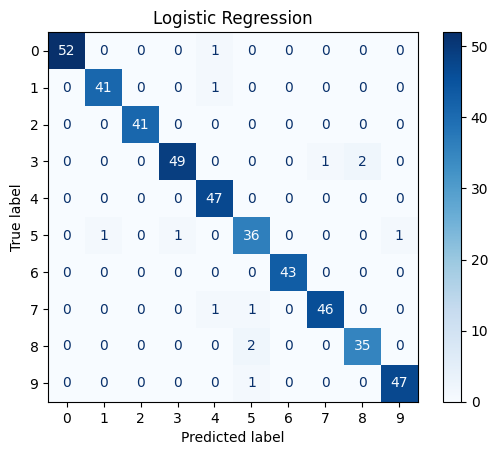

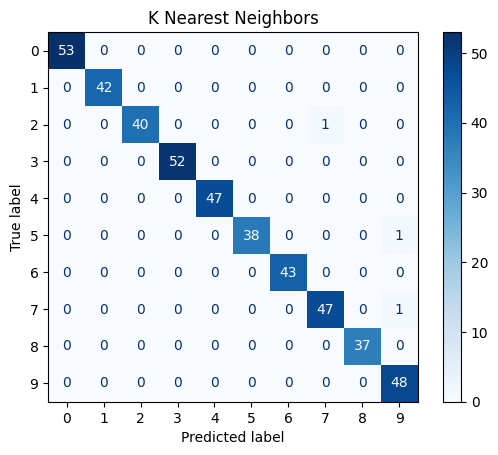

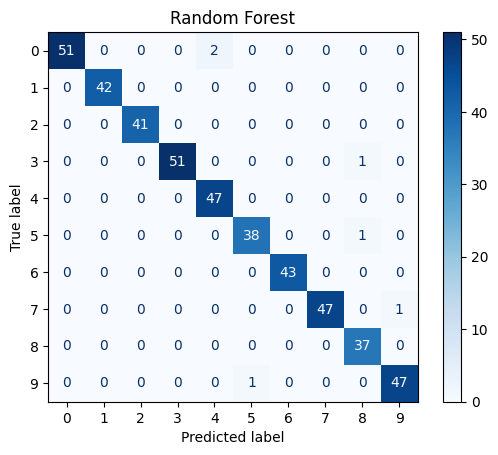

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test,y_reg_log)
cm_kn = confusion_matrix(y_test,y_reg_kn)
cm_rf = confusion_matrix(y_test,y_reg_rf)

graph_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=digits_dict['target_names'])
graph_log.plot(cmap= 'Blues')
plt.title('Logistic Regression')

graph_kn = ConfusionMatrixDisplay(confusion_matrix=cm_kn, display_labels=digits_dict['target_names'])
graph_kn.plot(cmap= 'Blues')
plt.title('K Nearest Neighbors')

graph_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=digits_dict['target_names'])
graph_rf.plot(cmap= 'Blues')
plt.title('Random Forest')

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df_metrics=pd.DataFrame()
df_metrics['method']=['logistic_reg','k-neighbors','random_forest']

acc_log=accuracy_score(y_test,y_reg_log)
acc_kn=accuracy_score(y_test,y_reg_kn)
acc_rf=accuracy_score(y_test,y_reg_rf)

df_metrics['accuracy_score']=[acc_log,acc_kn,acc_rf]

prec_log=precision_score(y_test,y_reg_log,average='macro')
prec_kn=precision_score(y_test,y_reg_kn,average='macro')
prec_rf=precision_score(y_test,y_reg_rf,average='macro')

df_metrics['precision_score']=[prec_log,prec_kn,prec_rf]

rec_log=recall_score(y_test,y_reg_log,average='macro')
rec_kn=recall_score(y_test,y_reg_kn,average='macro')
rec_rf=recall_score(y_test,y_reg_rf,average='macro')

df_metrics['recall_score']=[rec_log,rec_kn,rec_rf]

f1_log=f1_score(y_test,y_reg_log,average='macro')
f1_kn=f1_score(y_test,y_reg_kn,average='macro')
f1_rf=f1_score(y_test,y_reg_rf,average='macro')

df_metrics['f1_score']=[f1_log,f1_kn,f1_rf]

df_metrics['reg_time']=[delta_log,delta_kn,delta_rf]

df_metrics


,method,accuracy_score,precision_score,recall_score,f1_score,reg_time
0,logistic_reg,0.971111,0.970003,0.970615,0.970145,0.208490
1,k-neighbors,0.993333,0.993917,0.992914,0.993343,0.040059
2,random_forest,0.986667,0.986143,0.987573,0.986691,0.340094


Claramente, el modelo de "K Nearest Neighbors" tiene el mejor score en todas las categorías, y además resultó ser el más rápido en calcular la regresión de los datos. Luego, vamos a escoger este modelo por sobre "Logistic Regression" y "Random Forest".

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

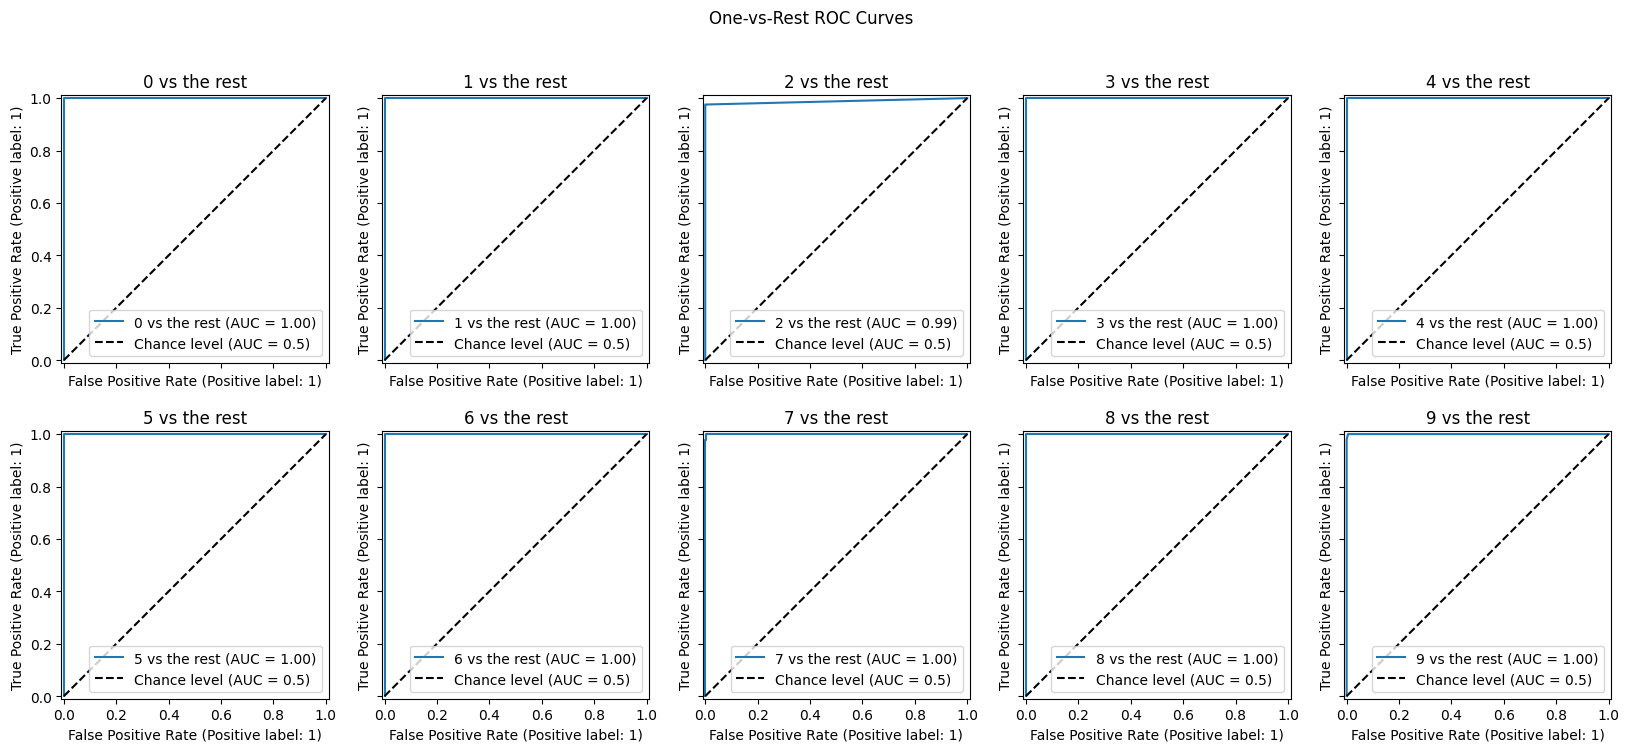

In [177]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

fig,axs=plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

for i in range(10):

    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    y_score = reg_kn.predict_proba(X_test)

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        plot_chance_level=True,
        ax=axs[i//5,i%5]
    )

    axs[i//5,i%5].set_title(f"{class_of_interest} vs the rest")

plt.suptitle("One-vs-Rest ROC Curves")
plt.show()



Podemos ver que todas las "One-vs-Rest ROC Curves" son muy empinadas, y todas tienen area debajo de la curva de 1 aproximadamente (salvo la curva del 2, que tiene área bajo la curva de 0.99 aproximadamente). Esto significa que el modelo predice muy bien el resultado, pues tiene un muy buen índice de verdaderos positivos para cada dígito.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [95]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Esta función grafica los resultados de cuando el valor predicho y original son iguales:


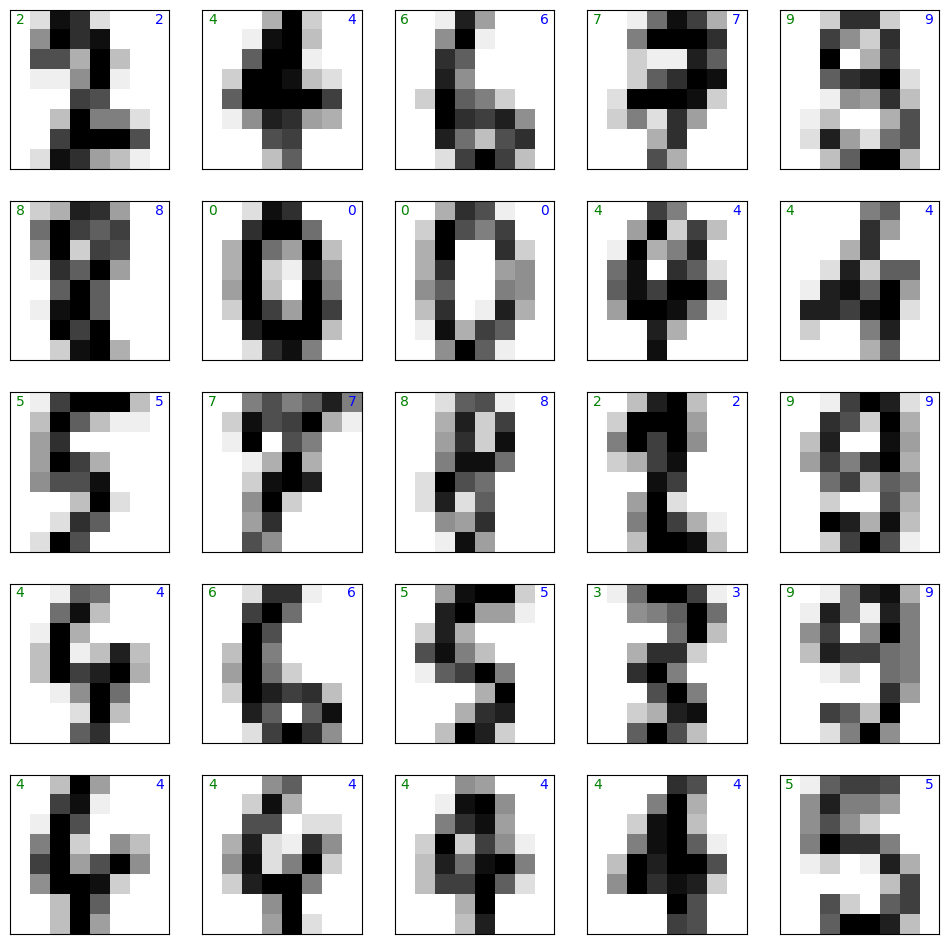

In [112]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=5,ny=5,label='correctos')

Por otro lado, esta siguiente función grafica cuando el valor predicho y original son distintos:

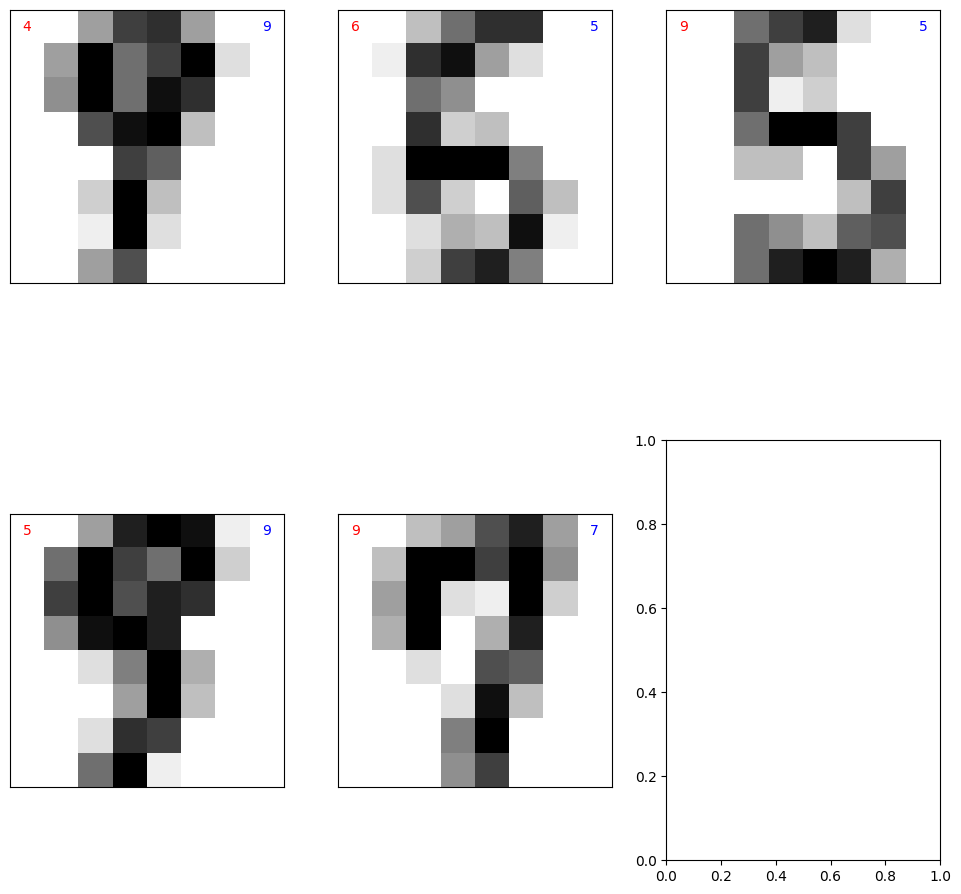

In [179]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=2,ny=3,label='incorrectos')

Podemos ver que este modelo solo se equivoco en 5 instancias. En estos pocos casos, podemos observar que los números originales tienen un alto grado de distorsión. Por ejemplo, en el gráfico de más arriba, podemos ver que el número que debiese ser un 9 se ve visualmente entremedio de un 4 y un 9. Esto ocurre similarmente con cada uno de los gráficos, confundiendo los pares de números: 4 con 9, 6 con 5, 9 con 7, 5 con 9 y 9 con 5.

Visualmente, estos números son bastante similares, y las diferencias principales que tienen son segmentos de linea cortos conectando los numeros (5 con 6, 9 con 7, 5 con 9, 9 con 5) o ligeras diferencias de posiciones de curvas en la figura (4 con 9).

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Opino que el modelo entrenado en este problema resuelve bastante bien en realizar la mejor predicción posible de una imagen, que en este caso es un dibujo de un número del 0 al 9. De los 1797 dibujos, predijo correctamente 1792 de ellos y se equivoco solamente 5 veces, en las cuales los dibujos presentaban grados de distorsion considerables.

Unos buenos trabajos a futuro despues de crear este modelo puede ser predecir números de múltiples dígitos e identificar más símbolos aparte de números. En estos casos (a excepción de mejorar la resolución probablemente), se induciría mayor dificultad al modelo predictivo, puesto que se pueden presentar distintos problemas no muy presentes en lo analizado previamente. Al añadir más símbolos, hay más posibilidades de confusión por la baja resolución, y el predecir números de más de un dígito presentaría problemas separando los dígitos individuales y en acertar, pues debe tener multiples aciertos individuales por dígito para acertar.